# Exploratory Data Analysis

## 1. Load the data

In [124]:
import string
import pandas as pd

table_df = pd.read_csv('data/1-JanTweets.csv')
table_df.head()

,Unnamed: 0,date,language,likes,retweets,screen_name,tweet,tweet_id
0,0.0,2020-01-01 19:08:15,und,0.0,0.0,Lil_COVID,@rammthagreat 🤣😭😭,1.212450480137392e+18
1,1.0,2020-01-01 17:24:25,en,1.0,0.0,MattFrieman,@Crof @BioAndBaseball Anyone know if there is ...,1.2124243521694147e+18
2,2.0,2020-01-01 16:41:21,und,1.0,0.0,CoVid_19_0290,https://t.co/vzXNs2RAPR,1.2124135119655854e+18
3,3.0,2020-01-01 22:04:34,und,1.0,0.0,captmakret,@RJPilkenton @brianstelter https://t.co/oHZFv8...,1.2124948507650212e+18
4,4.0,2020-01-01 14:05:11,en,21.0,5.0,COVID_19_ZA,Today at King Dinizulu Hospital welcoming the ...,1.212374210057851e+18


In [125]:
# Loop through the whole list and remove the coloumn headings,
# since they repeat after every 100 entries

for i in range(len(table_df)):
    if table_df.loc[i, "tweet"] == "tweet":
        #print(i)
        table_df=table_df.drop(index=i)

In [126]:
print(table_df.head())


   Unnamed: 0                 date language likes retweets    screen_name  \
0         0.0  2020-01-01 19:08:15      und   0.0      0.0      Lil_COVID   
1         1.0  2020-01-01 17:24:25       en   1.0      0.0    MattFrieman   
2         2.0  2020-01-01 16:41:21      und   1.0      0.0  CoVid_19_0290   
3         3.0  2020-01-01 22:04:34      und   1.0      0.0     captmakret   
4         4.0  2020-01-01 14:05:11       en  21.0      5.0    COVID_19_ZA   

                                               tweet                tweet_id  
0                                  @rammthagreat 🤣😭😭   1.212450480137392e+18  
1  @Crof @BioAndBaseball Anyone know if there is ...  1.2124243521694147e+18  
2                            https://t.co/vzXNs2RAPR  1.2124135119655854e+18  
3  @RJPilkenton @brianstelter https://t.co/oHZFv8...  1.2124948507650212e+18  
4  Today at King Dinizulu Hospital welcoming the ...   1.212374210057851e+18  


## 2. Removing '@' mentions
@ mentions in the tweets aren't really useful.
We can remove them from all the tweets if any tweet
mentions another user.


In [127]:
# Get the row data from the tuple returned by iterarrows()
next(table_df.iterrows())[1]

Unnamed: 0                         0
date             2020-01-01 19:08:15
language                         und
likes                            0.0
retweets                         0.0
screen_name                Lil_COVID
tweet              @rammthagreat 🤣😭😭
tweet_id       1.212450480137392e+18
Name: 0, dtype: object

In [128]:
# Check for presence of @ character
table_df["tweet"].str.contains("@")

0         True
1         True
2        False
3         True
4        False
         ...  
23795    False
23796    False
23797    False
23798    False
23799     True
Name: tweet, Length: 23565, dtype: bool

In [129]:
# Small example showing how to remove @ mentions
import re
text="@archity how are you?"
newText=re.sub('@.*? ', '', text)
print(newText)

how are you?


In [130]:
df_clean=table_df

# Function for removing @ mentions and hyperlinks
def remove_mentions(text):
    newtext=re.sub('@.*? ', '', text)
    newtext = re.sub(r'https?:\/\/.*[\r\n]*', '', newtext)
    return newtext

df_clean['tweet']=table_df.tweet.apply(lambda x: remove_mentions(x))
print(type(df_clean.tweet))


print(df_clean.head(20)["tweet"])

# Get the data type of each coloumn
#print(df_clean.dtypes)

<class 'pandas.core.series.Series'>
0                                                   🤣😭😭
1     Anyone know if there is a specific word for SA...
2                                                      
3                                                      
4     Today at King Dinizulu Hospital welcoming the ...
5                                                      
6     #فكرة ..\n#استخدمها بدلا من الزمور ❤️\n\nحط ال...
7                              What’s a good food spot?
8           Lmaoo damn what a way to start the new year
9     Thank you man! so glad we get to live another ...
10    Osea alguien te jala y debes aguantar. No seas...
11                                            Nasty? 🥴🤣
12    Bizle ne alakası var aq beni niye etiketliyon ...
13    My 2 year old nephew walks around the house an...
14    Earth: Makes a full rotation around the sun\nH...
15    Lol, yep I'm lifting now. It's like a morgue i...
16                                    Love these pups. 
17    plying

In [131]:
# Go through each tweet and put individual word into a list
from collections import Counter

print("Coloumn tweet type: ", type(df_clean.tweet))

word_list = []

for tweet in df_clean.tweet:
    word_list+=(tweet.split())


#word_list[:100]
print(Counter(word_list).most_common(20))

print(len(word_list), "total words")

Coloumn tweet type:  <class 'pandas.core.series.Series'>
[('coronavirus', 7905), ('the', 7284), ('de', 6963), ('a', 5961), ('of', 5593), ('to', 5153), ('in', 5142), ('China', 3920), ('en', 3159), ('#coronavirus', 3110), ('Coronavirus', 3024), ('el', 2896), ('que', 2854), ('and', 2802), ('is', 2425), ('la', 2308), ('new', 2218), ('for', 1947), ('from', 1863), ('Wuhan', 1845)]
383625 total words


Some remarks-

* We can see that there are several article words (a, an , the), prepositions (in, of), as well as non-English prepositions (en, de) So we need to remove such non-essential words.
* 'coronavirus' and 'coronavirus.' (with a dot) are taken as two seperate words. So we may need to remove all such punctuation marks.
* 'Coronavirus' and 'coronavirus' are also treaded as two different words, so we need to take care of upper/lower case letters. 

In [132]:
# Convert all the letters of words to lowercase
word_list_lower = list(map(lambda x:x.lower(), word_list))

# Get the count values of all the words
words_counter = Counter(word_list_lower).most_common()

# Convert the Counter list to a Pandas dataframe
words_counter_df = pd.DataFrame.from_records(list(dict(words_counter).items()), columns=['word', 'count'])

print(len(word_list_lower), "total words")
print(len(Counter(word_list_lower)), "unique words")


with open('all-words.txt', 'w', encoding="utf-8") as filehandle:
    for listitem in word_list_lower:
        filehandle.write('%s\n' % listitem)

383625 total words
57106 unique words


In [11]:
import itertools

# Remove English, French and Spanish Parts of Speech (PoS) words
english_pos = ["a", "an", "the", "in", "on", "of", "for", "to", "by", "at", "till", "until", "i", "as", "it", "he", "she", "you", "via", "and"]
french_pos = ["en", "de", "le", "la", "les", "des", "à", "un", "une", "se"]
spanish_pos = ["el", "por", "que"]

for word1, word2, word3 in itertools.zip_longest(english_pos, french_pos, spanish_pos):
    words_counter_df.drop(words_counter_df[words_counter_df.word == word1].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word2].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word3].index, inplace=True)
    #print(word1, word2, word3)

words_counter_df.reset_index()
words_counter_df[:20]

,word,count
0,coronavirus,11178
7,china,4113
8,#coronavirus,3957
11,new,3149
15,is,2639
17,from,2015
18,wuhan,1881
19,-,1751
21,y,1519
24,that,1427


* We see that there are too many different types of PoS words that are coming across. It's better to utilize Python's NLTK library for further refinement.

In [12]:
df_clean.tweet.loc[1]

'Anyone know if there is a specific word for SARS vs Coronavirus that google translate has issues with? Wondering if there are non-Chinese speaking translation issues we are being skewed by.'

In [13]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
words_counter_df = words_counter_df.reset_index(drop=True)

In [15]:
words = words_counter_df['word']
word_list = words.values.tolist()
word_list[:10]


['coronavirus',
 'china',
 '#coronavirus',
 'new',
 'is',
 'from',
 'wuhan',
 '-',
 'y',
 'that']

In [16]:
# Tag all the unique words with POS tagging
tagged_word = nltk.pos_tag(word_list)

In [17]:
tagged_word[:20]

[('coronavirus', 'NN'),
 ('china', 'NNS'),
 ('#coronavirus', 'VBP'),
 ('new', 'JJ'),
 ('is', 'VBZ'),
 ('from', 'IN'),
 ('wuhan', 'JJ'),
 ('-', ':'),
 ('y', 'NN'),
 ('that', 'IN'),
 ('outbreak', 'VBZ'),
 ('no', 'DT'),
 ('chinese', 'JJ'),
 ('novel', 'NN'),
 ('with', 'IN'),
 ('del', 'NN'),
 ('be', 'VB'),
 ('has', 'VBZ'),
 ('this', 'DT'),
 ('virus', 'NN')]

Let's try to download NLTK's stopwords database for English, French, and Spanish


In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [88]:
stopwords_english = stopwords.words('english') 
stopwords_french = stopwords.words('french')
stopwords_spanish = stopwords.words('spanish')

print('Stop words\n')
print(stopwords_english)
print(stopwords_french)
print(stopwords_spanish)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [133]:
for word1, word2, word3, punc in itertools.zip_longest(stopwords_english, stopwords_french, stopwords_spanish, string.punctuation):
    words_counter_df.drop(words_counter_df[words_counter_df.word == word1].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word2].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word3].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == punc].index, inplace=True)

#words_counter_df.reset_index()
words_counter_df = words_counter_df.reset_index(drop=True)

In [134]:
words_counter_df[:20]

,word,count
0,coronavirus,11178
1,china,4113
2,#coronavirus,3957
3,new,3149
4,wuhan,1881
5,outbreak,1381
6,chinese,1356
7,novel,1341
8,virus,1096
9,case,1014


## Word Cloud

In [135]:
# Rename the column 'count' to 'freq'
words_counter_df.columns = ['word', 'freq']

# Convert pd dataframe to dictionary for input for wordcould
wordcount_dict = dict(zip(words_counter_df.word, words_counter_df.freq))
# Print first 10 items of this dict
print(list(wordcount_dict.items())[0:10])

[('coronavirus', 11178), ('china', 4113), ('#coronavirus', 3957), ('new', 3149), ('wuhan', 1881), ('outbreak', 1381), ('chinese', 1356), ('novel', 1341), ('virus', 1096), ('case', 1014)]


In [136]:
#print(words_counter_df['freq'].where(words_counter_df['word']=='&amp;'))
#words_counter_df.lookup(words_counter_df.word, words_counter_df.freq)

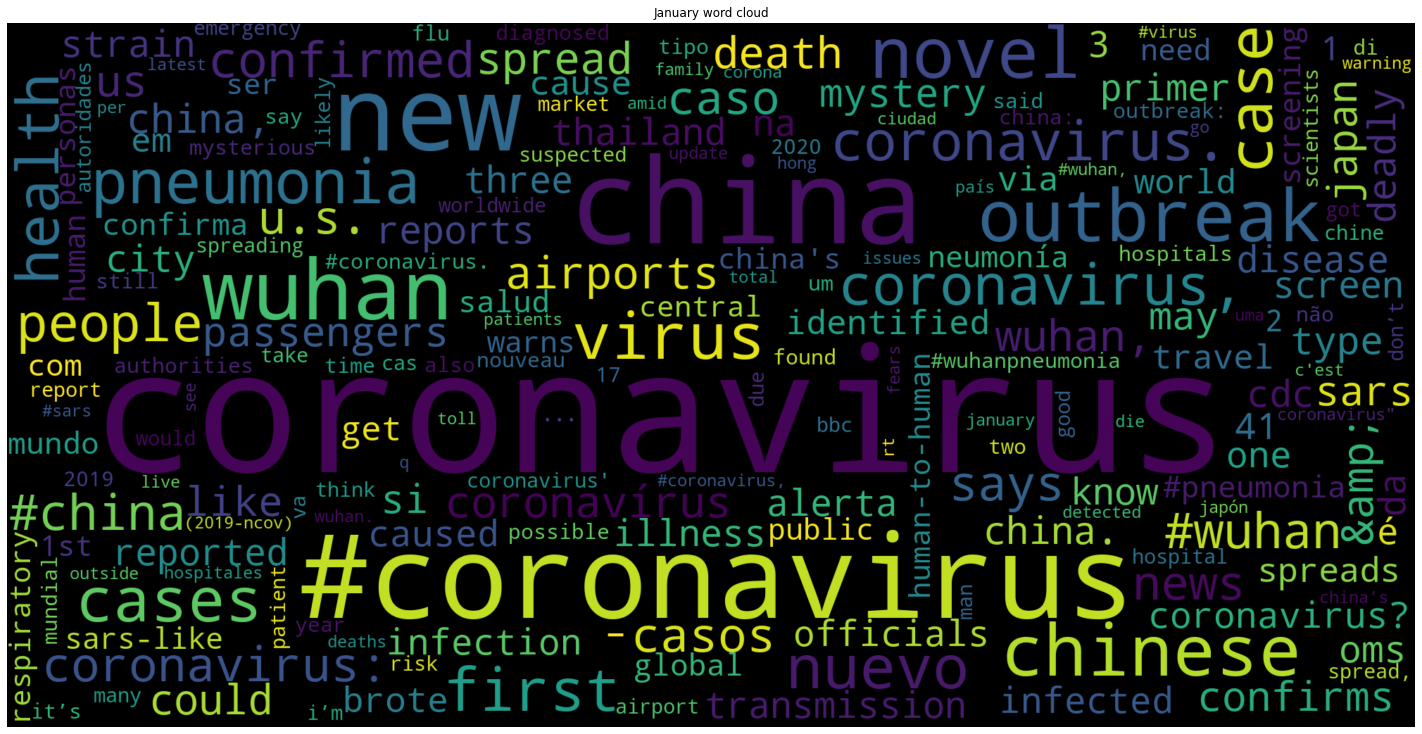

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=2000, height=1000).generate_from_frequencies(wordcount_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation='bilinear')
plt.title('January word cloud')
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show()
wc.to_file('img/wordcloud_jan.png')
#plt.savefig("img/wordcloud_jan.png", format="png")